In [3]:
import mdtraj as md
import pandas as pd
from glob import glob
mono_traj_dir = "/mnt/hdd/work/braf-craf/actual_work/code/braf-craf/work/trajectories/braf_mono/*"
pdb = glob(mono_traj_dir+".pdb")[0]
dcds = glob(mono_traj_dir+".dcd")
for dcd in dcds:
    traj = md.load(dcd,top=pdb)
    traj
glob(mono_traj_dir)

['/mnt/hdd/work/braf-craf/actual_work/code/braf-craf/work/trajectories/braf_mono/DFGoutACinV1.pdb',
 '/mnt/hdd/work/braf-craf/actual_work/code/braf-craf/work/trajectories/braf_mono/InInNoATP.pdb',
 '/mnt/hdd/work/braf-craf/actual_work/code/braf-craf/work/trajectories/braf_mono/DFGoutACinV3.dcd',
 '/mnt/hdd/work/braf-craf/actual_work/code/braf-craf/work/trajectories/braf_mono/DFGoutACinV3.pdb',
 '/mnt/hdd/work/braf-craf/actual_work/code/braf-craf/work/trajectories/braf_mono/DFGoutACinV4.pdb',
 '/mnt/hdd/work/braf-craf/actual_work/code/braf-craf/work/trajectories/braf_mono/OutOutNoATP.pdb',
 '/mnt/hdd/work/braf-craf/actual_work/code/braf-craf/work/trajectories/braf_mono/DFGoutACinV2.dcd',
 '/mnt/hdd/work/braf-craf/actual_work/code/braf-craf/work/trajectories/braf_mono/OutOutNoATP.dcd',
 '/mnt/hdd/work/braf-craf/actual_work/code/braf-craf/work/trajectories/braf_mono/DFGoutACinV4.dcd',
 '/mnt/hdd/work/braf-craf/actual_work/code/braf-craf/work/trajectories/braf_mono/MyInIn.dcd',
 '/mnt/hdd/

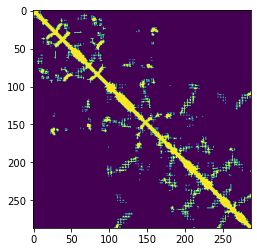

In [17]:
import h5py
import matplotlib.pyplot as plt
from mdtools.cmaps import ContactMap as cm
hdf = "/mnt/hdd/work/braf-craf/actual_work/code/braf-craf/work/cmaps/cmaps_braf.h5"
hdf = h5py.File(hdf)
plt.imshow(hdf["all_cmaps"][0])
cmaps = cm(hdf["DFGoutACinV2"])

In [25]:
all_cm = hdf["all_cmaps"]
summed = all_cm[:].sum(axis=-1)

<BarContainer object of 287 artists>

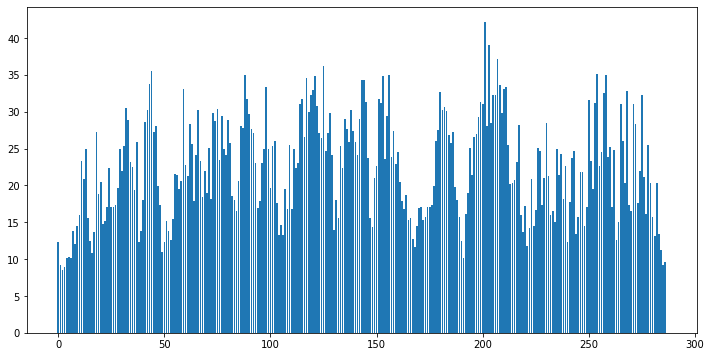

In [31]:
plt.title("Across all frames")
plt.figure(figsize=(12,6))
heights = summed.mean(axis=0)
x = [*range(len(heights))]
plt.bar(x,heights)

(2745, 287, 287)
(2657, 287, 287)


<BarContainer object of 287 artists>

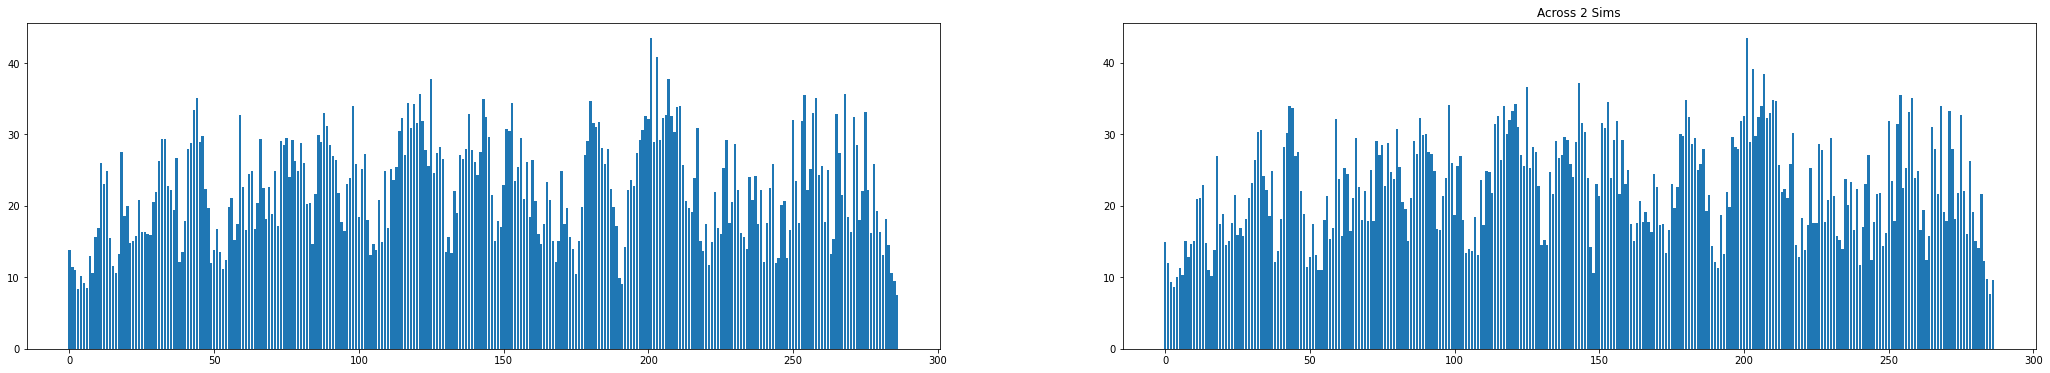

In [50]:
cmaps1 = cmaps_to_bars(hdf["DFGoutACinV2"])
cmaps2 = cmaps_to_bars(hdf["DFGoutACinV3"])
fig,axs = plt.subplots(1,2,figsize=(36,6))
plt.title("Across 2 Sims")
heights1 = cmaps1
heights2 = cmaps2
x = [*range(len(heights))]
axs[0].bar(x,heights1)
axs[1].bar(x,heights2)

<BarContainer object of 287 artists>

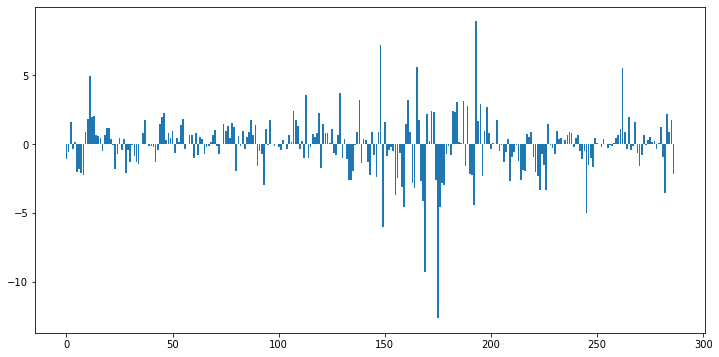

In [48]:
plt.figure(figsize=(12,6))
heights = cmaps1 - cmaps2
x = [*range(len(heights))]
plt.bar(x,heights)

In [33]:
evry.shape

(2745, 287, 287)

In [46]:
def cmaps_to_bars(cmaps):
    cmaps = cm(cmaps)
    cmaps = (cmaps.all() < .8)*1
    print(cmaps.shape)
    cmaps = cmaps.sum(axis=-1)
    cmaps = cmaps.mean(axis=0)
    return cmaps

In [49]:
cmaps1.sum()

6452.540983606557